In [1]:
%matplotlib ipympl
import numpy as np
import sympy as sp
from sympy.physics.wigner import wigner_d
from matplotlib import pyplot as plt
from matplotlib.colors import LightSource
from multiprocessing import Pool
import os

In [2]:
D = 17
interaction_pattern = "r"
cwd = os.getcwd()
concurrences_path = "/data/wigners/"
concurrences_filename = interaction_pattern + "concs_dim" + str(D) + ".npy"
measurement_concurrences = np.load(cwd+concurrences_path+concurrences_filename)
alpha_res, beta_res = measurement_concurrences.shape

In [3]:
alphas = np.linspace(0,np.pi,alpha_res)
betas = np.linspace(0,np.pi/2,beta_res)

Text(0.255, 0.68, '(a)')

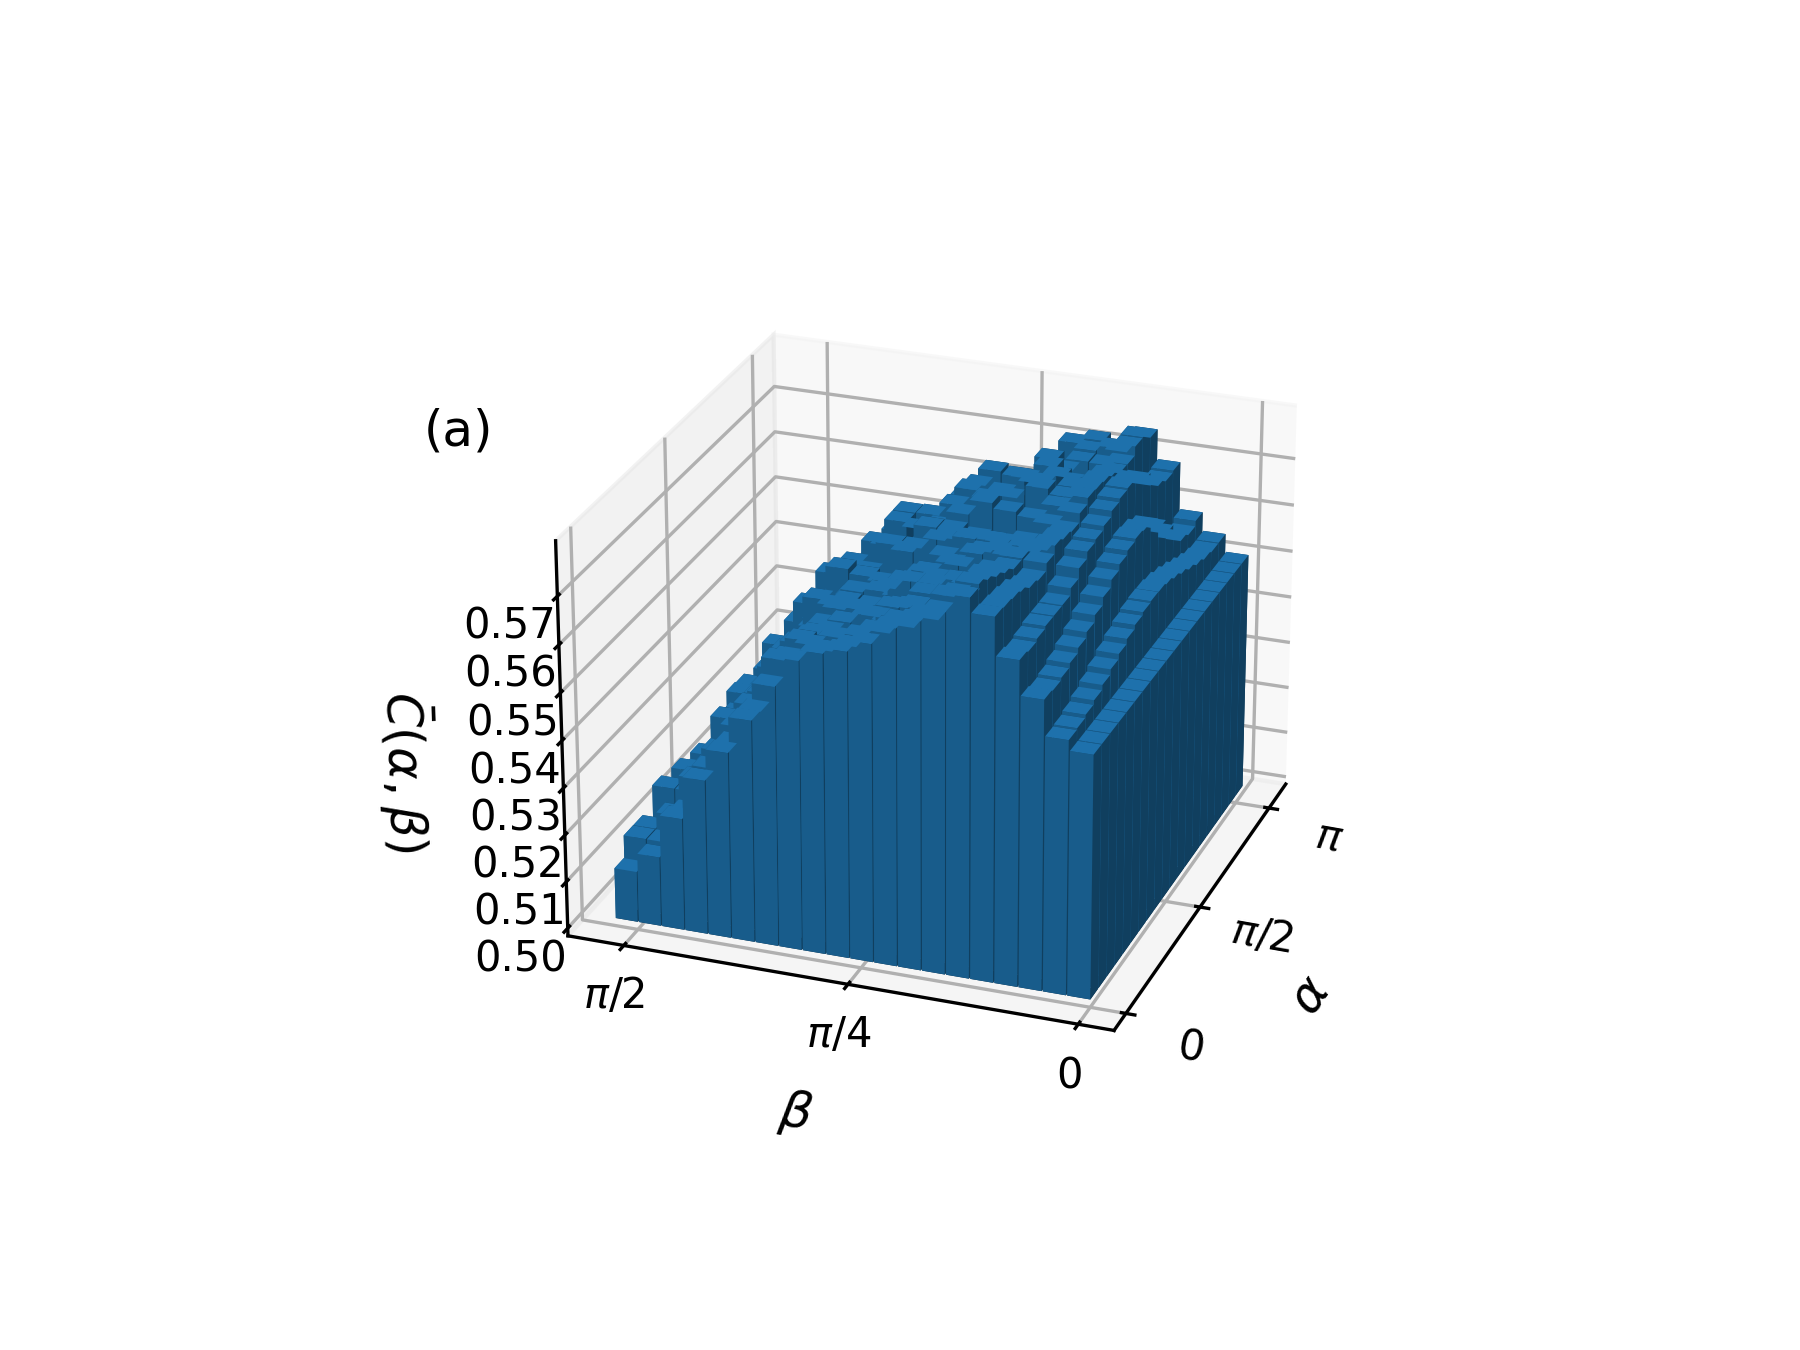

In [4]:
_xx, _yy = np.meshgrid(alphas, betas)
x, y = _xx.ravel(), _yy.ravel()
width = np.max(alphas)/alpha_res
depth = np.max(betas)/beta_res
light = LightSource(azdeg=315,altdeg=60)
fig = plt.figure(figsize=(6,4.5),dpi=300)
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=25,azim=-160,roll=0)
ax.set_xlabel(r'$\alpha$',fontsize=12)
ax.set_xticks([0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],[r'$0$',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'],rotation=-10,verticalalignment='bottom',horizontalalignment='center')
ax.tick_params('x',pad=7)
ax.set_ylabel(r'$\beta$',fontsize=12)
ax.set_yticks([0,np.pi/4,np.pi/2],[r'$0$',r'$\pi/4$',r'$\pi/2$'])
ax.tick_params('y',pad=-2)
ax.set_zlabel(r'$\bar{C}(\alpha,\beta)$',fontsize=12)
ax.tick_params('z',pad=0)
low_lim = 0
disp = 0.5
top_disp = 0.5
ax.set_zlim(low_lim+disp,np.max(measurement_concurrences)+disp-top_disp)
ax.set_box_aspect(None, zoom=0.85)
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5
ax.zaxis.labelpad = 5
ax.bar3d(x,y,low_lim+disp,width,depth,measurement_concurrences.flatten('F')-low_lim-disp,lightsource=light)
fig.text(0.255,0.68, '(a)', horizontalalignment='center', verticalalignment='center', fontsize=12)